In [59]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [60]:
print(tf.__version__)
print(tf.executing_eagerly())

2.3.1
True


In [61]:
train_dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                          origin = train_dataset_url)
print("Dataset Path: {}".format(train_dataset_fp))

Dataset Path: C:\Users\texas\.keras\datasets\iris_training.csv


In [62]:
column_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]

print('Featues: {}'.format(feature_names))
print('Label: {}'.format(label_name))

Featues: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [63]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [64]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name = label_name,
    num_epochs=1
)

In [65]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.9, 5.6, 5.9, 6.7, 4.9, 5.4, 4.4, 6.5, 5.1, 7.2, 6.3, 5. , 6.5,
       5. , 4.8, 5.7, 4.9, 6.7, 5.8, 4.6, 4.9, 6.9, 5.8, 5.4, 5.9, 5. ,
       7. , 5.8, 5. , 4.6, 6. , 5.1], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.4, 2.7, 3.2, 3.3, 2.5, 3.9, 3. , 2.8, 3.8, 3. , 3.3, 2. , 3. ,
       3.4, 3.4, 2.8, 3.1, 3.1, 2.7, 3.6, 3.1, 3.2, 2.7, 3.7, 3. , 3.6,
       3.2, 2.6, 3.4, 3.4, 2.7, 2.5], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.3, 4.2, 4.8, 5.7, 4.5, 1.7, 1.3, 4.6, 1.5, 5.8, 6. , 3.5, 5.8,
       1.6, 1.6, 4.5, 1.5, 4.4, 5.1, 1. , 1.5, 5.7, 4.1, 1.5, 5.1, 1.4,
       4.7, 4. , 1.5, 1.4, 5.1, 3. ], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1. , 1.3, 1.8, 2.1, 1.7, 0.4, 0.2, 1.5, 0.3, 1.6, 2.5, 1. , 2.2,
       0.4, 0.2, 1.3, 0.1, 1.4, 1.9, 0.2, 0.1, 2.3, 1. , 0.2,

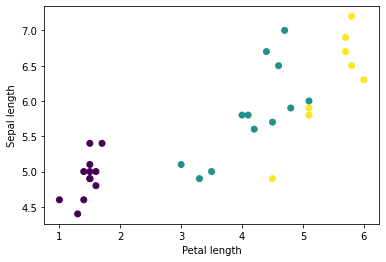

In [66]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.show()

In [67]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [68]:
train_dataset = train_dataset.map(pack_features_vector)

In [69]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[5.1 3.8 1.5 0.3]
 [5.8 2.7 5.1 1.9]
 [5.4 3.  4.5 1.5]
 [6.7 3.1 4.4 1.4]
 [6.8 3.2 5.9 2.3]], shape=(5, 4), dtype=float32)


In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation = tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [71]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.60008794,  0.62417746, -0.5047933 ],
       [-0.40503758, -0.2444199 ,  0.1088154 ],
       [-0.40971488, -0.16139339,  0.05154009],
       [-0.6307352 , -0.04927218, -0.08897361],
       [-0.49471158, -0.25077435,  0.09487337]], dtype=float32)>

In [72]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.1817637 , 0.61829937, 0.19993694],
       [0.2600134 , 0.30531707, 0.43466955],
       [0.2585359 , 0.3314099 , 0.41005424],
       [0.22184333, 0.39680082, 0.38135588],
       [0.24512783, 0.31284788, 0.4420243 ]], dtype=float32)>

In [73]:
print(tf.argmax(predictions, axis=1))
print(labels)

tf.Tensor([1 2 2 1 2 1 2 1 2 1 1 2 2 2 1 1 2 2 2 1 1 1 2 2 2 2 2 1 2 2 2 2], shape=(32,), dtype=int64)
tf.Tensor([0 2 1 1 2 0 2 0 1 0 0 2 2 1 0 0 1 2 2 1 0 0 2 1 1 2 2 1 2 1 1 2], shape=(32,), dtype=int32)


In [74]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [75]:
def loss(model, x, y):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels)
print(l)

tf.Tensor(1.1485931, shape=(), dtype=float32)


In [76]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [77]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_value, grads = grad(model, features, labels)

print('Steps: {}, Initial Loss: {}'.format(optimizer.iterations.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print('Steps: {}, Loss: {}'.format(optimizer.iterations.numpy(),
                                  loss(model, features, labels).numpy()))

Steps: 0, Initial Loss: 1.1485930681228638
Steps: 1, Loss: 1.1216580867767334


In [78]:
train_loss_results = []
train_accuracy_results = []

num_epochs=201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss_avg(loss_value)
        epoch_accuracy(y, model(x))
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 ==0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch, epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch 000: Loss: 1.111, Accuracy: 35.833%
Epoch 050: Loss: 0.069, Accuracy: 97.500%
Epoch 100: Loss: 0.062, Accuracy: 97.500%
Epoch 150: Loss: 0.048, Accuracy: 99.167%
Epoch 200: Loss: 0.046, Accuracy: 99.167%


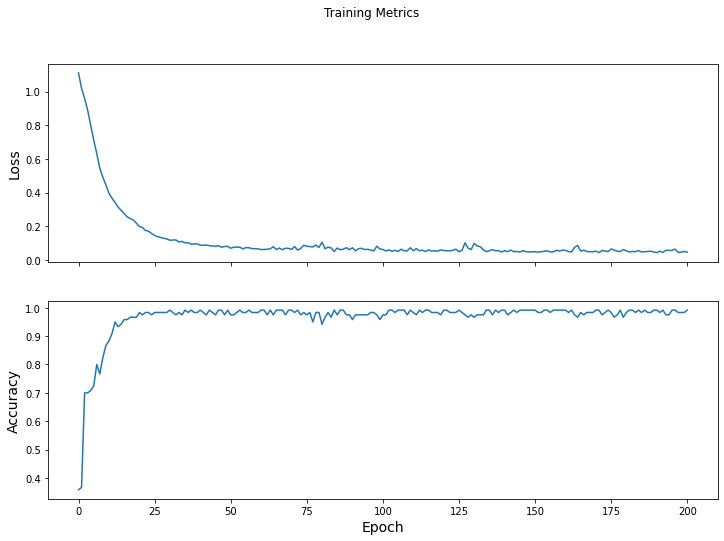

In [79]:
fig, axes = plt.subplots(2, sharex = True, figsize=(12,8))
fig.suptitle("Training Metrics")

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [80]:
test_url = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv'

test_fp = tf.keras.utils.get_file(fname = os.path.basename(test_url), origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0s/step


In [81]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names = column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False
)

test_dataset = test_dataset.map(pack_features_vector)

In [82]:
test_accuracy = tf.keras.metrics.Accuracy()
for(x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)
    print('Testset Accuracy: {:.3%}'.format(test_accuracy.result()))

Testset Accuracy: 96.667%


In [83]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [85]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)
for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print('Sample {} Prediction: {} ({:4.1f}%)'.format(i, name, 100*p))
    

Sample 0 Prediction: Iris setosa (99.9%)
Sample 1 Prediction: Iris versicolor (99.9%)
Sample 2 Prediction: Iris virginica (99.0%)
